In [1]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 0s (1,238 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 155676 files and directories curr

In [2]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pyzbar.pyzbar import decode

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. MOTION DETECTION AND TRACKING

In [39]:
video = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Sample_Data/mixkit-daytime-city-traffic-aerial-view-56.mp4')

ret, frame1 = video.read()
ret, frame2 = video.read()

while video.isOpened():
  
  diff = cv2.absdiff(frame1, frame2)
  gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
  dilated = cv2.dilate(thresh, None, iterations=3)
  contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:

    x,y,w,h = cv2.boundingRect(contour)

    if cv2.contourArea(contour):
      continue

    cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 1)
    

    cv2_imshow(frame1)
  frame1 = frame2

  ret, frame2 = video.read()

  key = cv2.waitKey(0)

  if key == 27:
    break

video.release()
cv2.destroyAllWindows()

2. HOUGH TRANSFORM

Hough Transform is a mathematical method used to detect lines in an image or inside a video. It is carried out by representing a line in the X Y graph space, as a point in the θ and ρ graph space, also known as the 'Hough Space'. 

The Hough Transform can be implemented in two systems, The Cartesian system and the Polar Co-ordinate system. It is generally preferred to be implemented in the Polar Co-ordinate system.

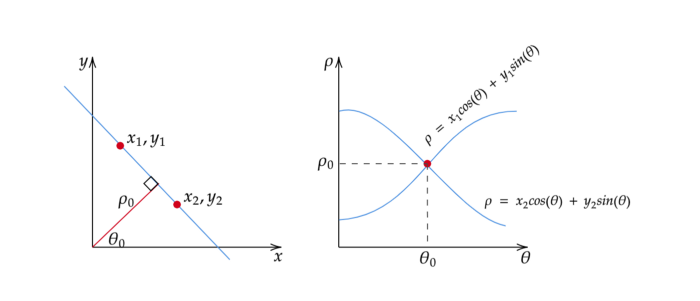

In the above diagram, the line in the first graph is represented as a point on the second graph(Hough Space). In the first graph, the θ is the angle that the line creates with respect to the origin of the graph, while ρ is the distance from the line's distance from the origin. 

In the Hough Space, the points are represented as the two curves and they intersect at point, which represent that line in the first graph. Notice, that the point in the Hough Space representing the line, is located at a certain (θ, ρ) which correspond to the θ and ρ in the Cartesian graph.

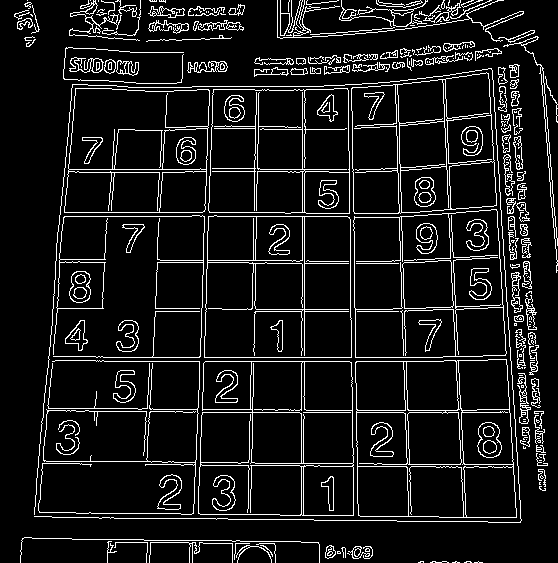

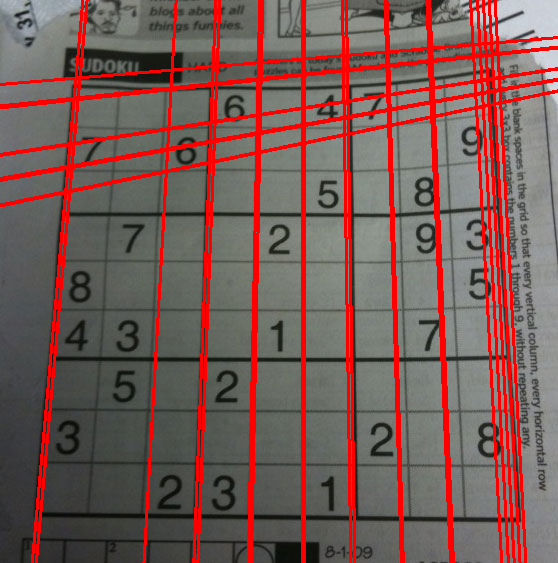

In [ ]:
crossword = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sample_Data/Hough Lines/sudoku.png')
crossword2 = crossword.copy()

crossword_gray = cv2.cvtColor(crossword, cv2.COLOR_BGR2GRAY)
crossword_canny = cv2.Canny(crossword_gray, 50, 150, apertureSize=3)
cv2_imshow(crossword_canny)

houghlines = cv2.HoughLines(crossword_canny, 1, np.pi/180, 200)

#Second and third argument determine that the measure of rho and theta values should be minimum these amounts.
#The last argument is the minimum number of votes the point should get to be considered as a line

#Once we have found the lines on the Hough Space, we calculate its (x0, y0), (x1, y1) and (x2, y2) edge points on the Cartesian graph
#in the following lines

for line in houghlines:

  ρ, θ = line[0]

  a = np.cos(θ)
  b = np.sin(θ)

  x0 = ρ*a
  y0 = ρ*b


  x1 = int(x0 + 1000 * (-b))
  y1 = int(y0 + 1000 * (a))

  x2 = int(x0 - 1000 * (-b))
  y2 = int(x0 - 1000 * (a))

  cv2.line(crossword, (x1,y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(crossword)

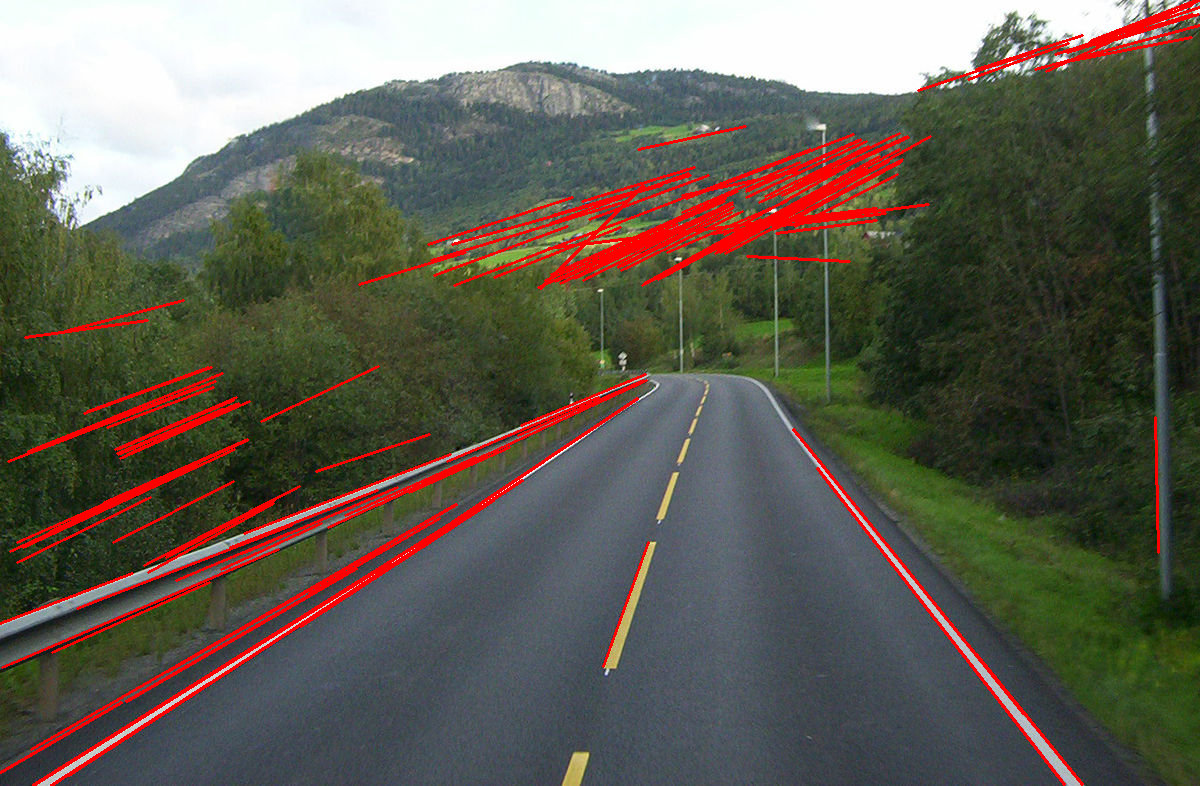

In [ ]:
houghlinesp = cv2.HoughLinesP(crossword_canny, 1, np.pi/180, 40, minLineLength = 100, maxLineGap = 10)

#Parameter 4th is the threshold to determine the number of interesecting points to determine a line
#minLineLength - Minimum length of line. Line segments shorter than this are rejected.
#maxLineGap - Maximum allowed gap between line segments to treat them as single line.

for line in houghlinesp:
  x1, y1, x2, y2 = line[0]
  cv2.line(crossword2, (x1,y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(crossword2)

Source for better understanding

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

3. BITWISE OPERATIONS

Bitwise operations are useful while masking, which is a process where a part of an image is isolated in order to perform certain operations.

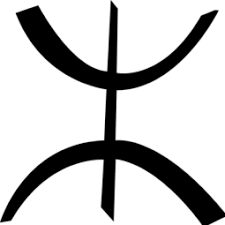

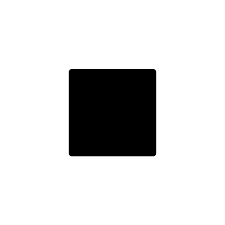

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sample_Data/Bitwise/download.png')
cv2_imshow(image1)
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sample_Data/Bitwise/black-and-white.png')
cv2_imshow(image2)

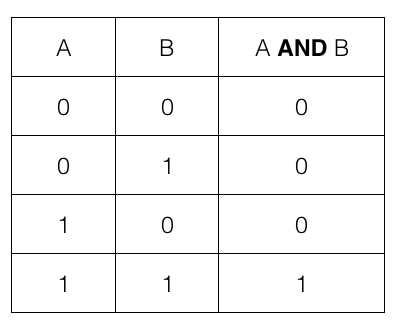

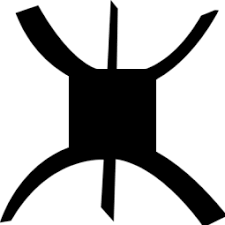

In [ ]:
bitwiseAnd = cv2.bitwise_and(image1, image2)
cv2_imshow(bitwiseAnd)

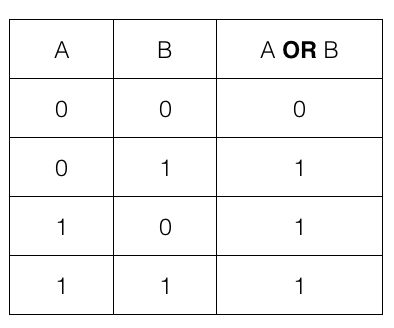

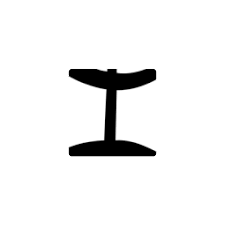

In [ ]:
bitwiseOR = cv2.bitwise_or(image1, image2)
cv2_imshow(bitwiseOR)

XOR 

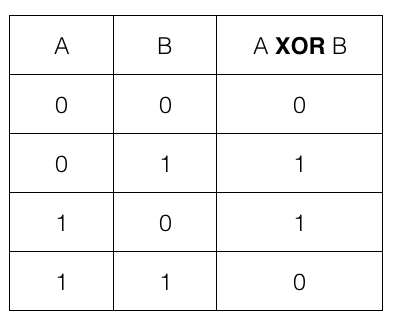

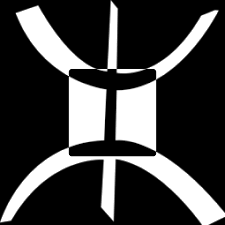

In [ ]:
bitwiseAnd = cv2.bitwise_xor(image1, image2)
cv2_imshow(bitwiseAnd)

4. QR CODE

This doesn't work, but it was originally written on local machine, where it works.

In [ ]:
live = cv2.VideoCapture(2)

while live.isOpened():
    success, frame = live.read()
    
    if not success:
        break
    
    for code in decode(frame):
        inside_data = code.data.decode("utf-8")
        
        rectangle_points = code.rect
        
        if inside_data:
            polygon_points = np.array([code.polygon], np.int32)
            cv2.polylines(frame, polygon_points, True, (0,0,255), 3)
            cv2.putText(frame, str(inside_data), (rectangle_points[0], rectangle_points[1]), cv2.FONT_HERSHEY_PLAIN, 2, 255, 3, cv2.LINE_AA)
    
    cv2.imshow("this", frame)
    
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break
        
live.release()
cv2.destroyAllWindows()

data  -> This field gives us the text or the information encoded in the QR Code

type  -> This field tells us the type of code QRCODE or BARCODE

rect -> This gives the left, top, width and the height of the rectangle enclosing the QR image. 
Even if the QR code is tilted, the rectangle stays upright giving us a bounding rectangle enclosing the entire QR Code

polygon -> This gives us the exact corner points of the polygon around the QR image. 
If the image of the QR code is tilted, so is the polygon bounding it.

5. COLOUR FILTERING WITH HSV FORMAT

HSV Colourspace is more robust towards external lighting changes

Colour filtering HSV colour space images is basically thresholding them as per the arrangement of HSV system using **cv2.inRange()** function.

In [7]:
ball = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/Sample_Data/Colour Filtering with HSV format/tennis_ball_on_court.png')

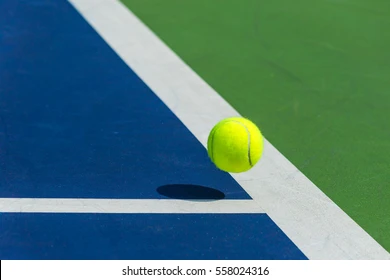

In [8]:
cv2_imshow(ball)

In [9]:
ballToHSV = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)

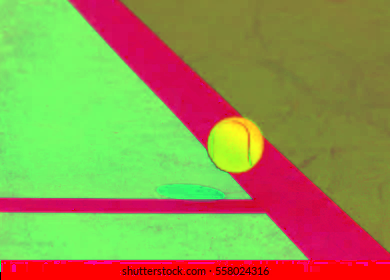

In [10]:
cv2_imshow(ballToHSV)

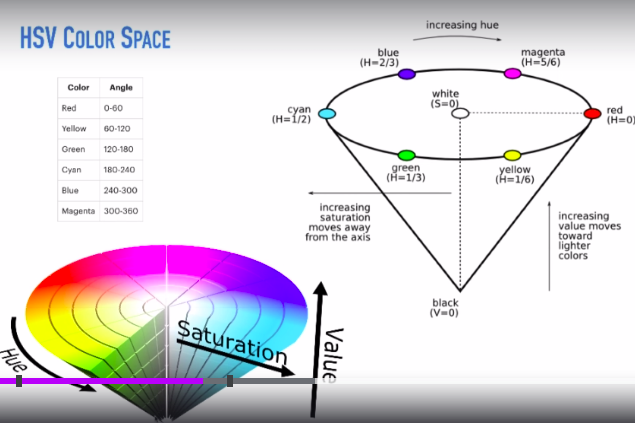

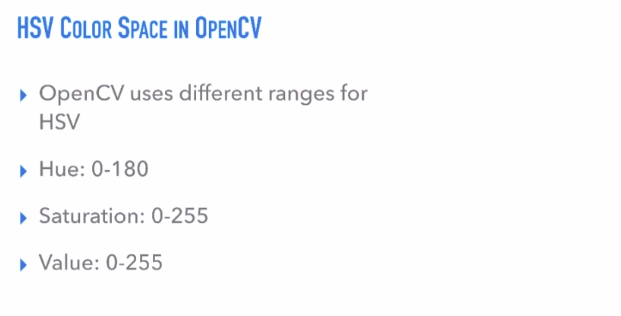

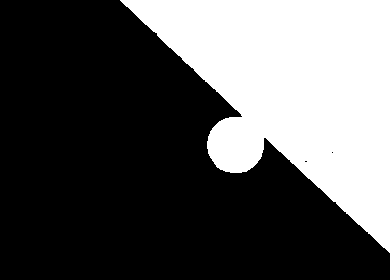

In [11]:
yellow_LowerBound = (30, 80, 10)
yellow_UpperBound = (60, 255, 255)

mask = cv2.inRange(ballToHSV, yellow_LowerBound, yellow_UpperBound)
cv2_imshow(mask)

6. ADAPTIVE THRESHOLDING

The key difference between normal thresholding and adaptive thresholding is that the former considers the provided parameter values and applies the resulting logic on all the pixels of the image at a go. 

The problem here is that a single threshold value T, when uniformly applied to an image, can cause discrepancies and irregular results because the pixel intensities are different from region to region in the image.

While adaptive thresholding focuses on each region separately in order to carry out a custom thresholding for each region.

"In adaptive thresholding, sometimes called local thresholding, our goal is to statistically examine the pixel intensity values in the neighborhood of a given pixel, p.

The general assumption that underlies all adaptive and local thresholding methods is that smaller regions of an image are more likely to have approximately uniform illumination. This implies that local regions of an image will have similar lighting, as opposed to the image as a whole, which may have dramatically different lighting for each region."


Read this to know more

https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

7. IMAGE SEGMENTATION

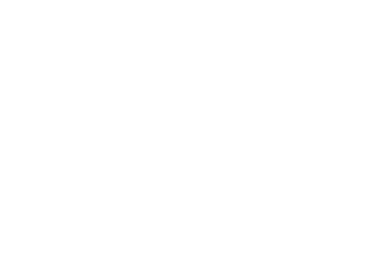

In [20]:
mask2 = 255 * np.ones(ball.shape, np.uint8)
cv2_imshow(mask2)

In [34]:
ballToHSV = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)
yellow_LowerBound = (30, 80, 10)
yellow_UpperBound = (48, 255, 255)

mask = cv2.inRange(ballToHSV, yellow_LowerBound, yellow_UpperBound)

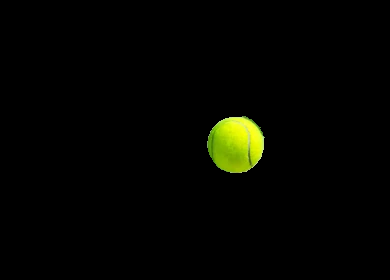

In [36]:
segmented_image = cv2.bitwise_and(ball, ball, mask=mask)
cv2_imshow(segmented_image)